This notebook reads in the CDF files and makes the plots for the CDFs at 150pc. 
This plots both the entire SNe sample and the SN sample by type.
It then calculates the percentiles and mean of each group of MGSD measurements and reports them in a latex table.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from astropy import table
from astropy.table import Table, join
from astropy.io import ascii
import astropy.io.fits as pyfits
import seaborn as sns

import os

import sys
sys.path.append('/home/mayker.1/Desktop/PythonFunctions')
#sys.path.append('/Users/nessmayker/Desktop/NessPythonFunctions')
from detectionFraction import detecFrac
from cumulativeDistFunc import makeCDF
from findPercentiles import findStats
from flattenList import flatten

colorSingle = "purple"
# color1of3   = "chocolate"
# color2of3   = "forestgreen" 
# color3of3   = "indigo"
# color1of3   = "#F5793A"
# color2of3   = "#A95AA1" 
color3of3   = "#382119"
color1of3   = "purple"
color2of3   = "orange" 
#color3of3   = "black"

In [2]:
# Convert MGSD to Mass

area = (150.0/2.0)**2*np.pi/np.log(2.0)

def mgsd2mass(x, rnd = None):
    y = np.log10(area) + x
    
    if rnd == None:
        pass
   
    else:
        for i in range(len(y)):
            y[i] = round(y[i],rnd)
    return(y)
        
        

def mass2mgsd(x):
    y = x - np.log10(area)
    return(y)

def makeLog(inputArr):
    outputArr = []
    for i in range(len(inputArr))
        outputArr.append(np.log10(inputArr[i])) 
    return(outputArr)


In [3]:
# Import supernovae CDFs

SNeCDFsFile   = "../Data/3.2a.SNeCDFs.fits"
SNeCDFs = Table.read(SNeCDFsFile)

SNeCDFs["Detections"]

1.5547443628311157 .. 260.3741149902344
0.4406779661016949 .. 1.0
10.026277557890959 .. 1095.244989467956
0.4406779661016949 .. 1.0


In [4]:
# IMPORT ALL CDFS and x & y coords for plots
# D: Detection, ND: NonDetection, SM: Sigma Mol, M: Mass, PP: Per Pixel
# CDFSN Supernova info CDF
# CDFAP All map Pixels CDF

CDFSN_D_x, CDFSN_D_y = SNeCDFs["Detections"][0], SNeCDFs["Detections"][1]
CDFSN_D_SM_x, CDFSN_D_SM_y = SNeCDFs["Detections"][2], SNeCDFs["Detections"][3] 

CDFSN_ND_x, CDFSN_ND_y = SNeCDFs["NonDetections"][0], SNeCDFs["NonDetections"][1]
CDFSN_ND_SM_x, CDFSN_ND_SM_y = SNeCDFs["NonDetections"][2], SNeCDFs["NonDetections"][3]

CDFSN_D_II_x, CDFSN_D_II_y = SNeCDFs["DetectionsII"][0], SNeCDFs["DetectionsII"][1]
CDFSN_D_SM_II_x, CDFSN_D_SM_II_y = SNeCDFs["DetectionsII"][2], SNeCDFs["DetectionsII"][3] 

CDFSN_ND_II_x, CDFSN_ND_II_y = SNeCDFs["NonDetectionsII"][0], SNeCDFs["NonDetectionsII"][1]
CDFSN_ND_SM_II_x, CDFSN_ND_SM_II_y = SNeCDFs["NonDetectionsII"][2], SNeCDFs["NonDetectionsII"][3]

CDFSN_D_Ia_x, CDFSN_D_Ia_y = SNeCDFs["DetectionsIa"][0], SNeCDFs["DetectionsIa"][1]
CDFSN_D_SM_Ia_x, CDFSN_D_SM_Ia_y = SNeCDFs["DetectionsIa"][2], SNeCDFs["DetectionsIa"][3] 

CDFSN_ND_Ia_x, CDFSN_ND_Ia_y = SNeCDFs["NonDetectionsIa"][0], SNeCDFs["NonDetectionsIa"][1]
CDFSN_ND_SM_Ia_x, CDFSN_ND_SM_Ia_y = SNeCDFs["NonDetectionsIa"][2], SNeCDFs["NonDetectionsIa"][3]

CDFSN_D_SESN_x, CDFSN_D_SESN_y = SNeCDFs["DetectionsSESN"][0], SNeCDFs["DetectionsSESN"][1]
CDFSN_D_SM_SESN_x, CDFSN_D_SM_SESN_y = SNeCDFs["DetectionsSESN"][2], SNeCDFs["DetectionsSESN"][3] 

CDFSN_ND_SESN_x, CDFSN_ND_SESN_y = SNeCDFs["NonDetectionsSESN"][0], SNeCDFs["NonDetectionsSESN"][1]
CDFSN_ND_SM_SESN_x, CDFSN_ND_SM_SESN_y = SNeCDFs["NonDetectionsSESN"][2], SNeCDFs["NonDetectionsSESN"][3]

CDFSN_D_UnC_x, CDFSN_D_UnC_y = SNeCDFs["DetectionsUnC"][0], SNeCDFs["DetectionsUnC"][1]
CDFSN_D_SM_UnC_x, CDFSN_D_SM_UnC_y = SNeCDFs["DetectionsUnC"][2], SNeCDFs["DetectionsUnC"][3] 

CDFSN_ND_UnC_x, CDFSN_ND_UnC_y = SNeCDFs["NonDetectionsUnC"][0], SNeCDFs["NonDetectionsUnC"][1]
CDFSN_ND_SM_UnC_x, CDFSN_ND_SM_UnC_y = SNeCDFs["NonDetectionsUnC"][2], SNeCDFs["NonDetectionsUnC"][3]

# Import All Pixel CDFs

CDFAP_D_File     = "../Data/3.2a_CDFAllPixelsDetections.fits"
CDFAP_ND_File    = "../Data/3.2a_CDFAllPixelsNonDetections.fits"

CDFAP_D_SM_File  = "../Data/3.2a_CDFAllPixelsDetectionSigmaMol.fits"
CDFAP_ND_SM_File = "../Data/3.2a_CDFAllPixelsNonDetectionSigmaMol.fits"

CDFAP_D_M_File = "../Data/3.2a_CDFAllPixelsDetectionMass.fits"
CDFAP_ND_M_File = "../Data/3.2a_CDFAllPixelsNonDetectionMass.fits"

CDFAP_D_SM_PP_File  = "../Data/3.2a_CDFAllPixelsDetectionSigmaMolPerPixel.fits"
CDFAP_ND_SM_PP_File = "../Data/3.2a_CDFAllPixelsNonDetectionSigmaMolPerPixel.fits"

CDFAP_D_M_PP_File  = "../Data/3.2a_CDFAllPixelsDetectionMassPerPixel.fits"
CDFAP_ND_M_PP_File = "../Data/3.2a_CDFAllPixelsNonDetectionMassPerPixel.fits"

CDFAP_D          = Table.read(CDFAP_D_File)
CDFAP_ND         = Table.read(CDFAP_ND_File) 
CDFAP_D_SM       = Table.read(CDFAP_D_SM_File) 
CDFAP_ND_SM      = Table.read(CDFAP_ND_SM_File) 
CDFAP_D_M        = Table.read(CDFAP_D_M_File)
CDFAP_ND_M       = Table.read(CDFAP_ND_M_File) 
CDFAP_D_SM_PP    = Table.read(CDFAP_D_SM_PP_File) 
CDFAP_ND_SM_PP   = Table.read(CDFAP_ND_SM_PP_File)
CDFAP_D_M_PP     = Table.read(CDFAP_D_M_PP_File)
CDFAP_ND_M_PP    = Table.read(CDFAP_ND_M_PP_File) 


AP_D_x, AP_D_y             = CDFAP_D["CDFAllPixelsDetections"][0], CDFAP_D["CDFAllPixelsDetections"][1]
AP_D_SM_x, AP_D_SM_y       = CDFAP_D_SM["CDFAllPixelsDetectionSigmaMol"][0], CDFAP_D_SM["CDFAllPixelsDetectionSigmaMol"][1]
AP_D_M_x, AP_D_M_y         = CDFAP_D_M["CDFAllPixelsDetectionMass"][0], CDFAP_D_M["CDFAllPixelsDetectionMass"][1]
AP_D_SM_PP_x, AP_D_SM_PP_y = CDFAP_D_SM_PP["CDFAllPixelsDetectionSigmaMolPerPixel"][0], CDFAP_D_SM_PP["CDFAllPixelsDetectionSigmaMolPerPixel"][1]
AP_D_M_PP_x, AP_D_M_PP_y   = CDFAP_D_M_PP["CDFAllPixelsDetectionMassPerPixel"][0], CDFAP_D_M_PP["CDFAllPixelsDetectionMassPerPixel"][1]

AP_ND_x, AP_ND_y             = CDFAP_ND["CDFAllPixelsNonDetections"][0], CDFAP_ND["CDFAllPixelsNonDetections"][1]
AP_ND_SM_x, AP_ND_SM_y       = CDFAP_ND_SM["CDFAllPixelsNonDetectionSigmaMol"][0], CDFAP_ND_SM["CDFAllPixelsNonDetectionSigmaMol"][1]
AP_ND_M_x, AP_ND_M_y         = CDFAP_ND_M["CDFAllPixelsNonDetectionMass"][0], CDFAP_ND_M["CDFAllPixelsNonDetectionMass"][1]
AP_ND_SM_PP_x, AP_ND_SM_PP_y = CDFAP_ND_SM_PP["CDFAllPixelsNonDetectionSigmaMolPerPixel"][0], CDFAP_ND_SM_PP["CDFAllPixelsNonDetectionSigmaMolPerPixel"][1]
AP_ND_M_PP_x, AP_ND_M_PP_y   = CDFAP_ND_M_PP["CDFAllPixelsNonDetectionMassPerPixel"][0], CDFAP_ND_M_PP["CDFAllPixelsNonDetectionMassPerPixel"][1]


In [5]:
# Convert functions to log for plot

logCDFAP_D_x       = makeLog(AP_D_x)
logCDFAP_D_SM_x    = makeLog(AP_D_SM_x)
logCDFAP_D_M_x     = makeLog(AP_D_M_x)
logCDFAP_D_SM_PP_x = makeLog(AP_D_SM_PP_x)
logCDFAP_D_M_PP_x  = makeLog(AP_D_M_PP_x)

logCDFAP_ND_x       = makeLog(AP_ND_x)
logCDFAP_ND_SM_x    = makeLog(AP_ND_SM_x)
logCDFAP_ND_M_x     = makeLog(AP_ND_M_x)
logCDFAP_ND_SM_PP_x = makeLog(AP_ND_SM_PP_x)
logCDFAP_ND_M_PP_x  = makeLog(AP_ND_M_PP_x)

logCDFSN_ND_x         = makeLog(CDFSN_ND_x)
logCDFSN_ND_SM_x      = makeLog(CDFSN_ND_SM_x)
logCDFSN_ND_II_x      = makeLog(CDFSN_ND_II_x)
logCDFSN_ND_SM_II_x   = makeLog(CDFSN_ND_SM_II_x)
logCDFSN_ND_Ia_x      = makeLog(CDFSN_ND_Ia_x)
logCDFSN_ND_SM_Ia_x   = makeLog(CDFSN_ND_SM_Ia_x)
logCDFSN_ND_SESN_x    = makeLog(CDFSN_ND_SESN_x)
logCDFSN_ND_SM_SESN_x = makeLog(CDFSN_ND_SM_SESN_x)
logCDFSN_ND_UnC_x     = makeLog(CDFSN_ND_UnC_x)
logCDFSN_ND_SM_UnC_x  = makeLog(CDFSN_ND_SM_UnC_x)

logCDFSN_D_x          = makeLog(CDFSN_D_x)
logCDFSN_D_SM_x       = makeLog(CDFSN_D_SM_x)
logCDFSN_D_II_x       = makeLog(CDFSN_D_II_x)
logCDFSN_D_SM_II_x    = makeLog(CDFSN_D_SM_II_x)
logCDFSN_D_Ia_x       = makeLog(CDFSN_D_Ia_x)
logCDFSN_D_SM_Ia_x    = makeLog(CDFSN_D_SM_Ia_x)
logCDFSN_D_SESN_x     = makeLog(CDFSN_D_SESN_x)
logCDFSN_D_SM_SESN_x  = makeLog(CDFSN_D_SM_SESN_x)
logCDFSN_D_UnC_x      = makeLog(CDFSN_D_UnC_x)
logCDFSN_D_SM_UnC_x   = makeLog(CDFSN_D_SM_UnC_x)

 

<ipython-input-2-b77ade6a48f5>:28: RuntimeWarning: divide by zero encountered in log10
  outputArr.append(np.log10(inputArr[i]))


In [6]:
# Convert SN Sigma Mol CDFs to mass

CDFSN_D_M_x, CDFSN_D_M_y   = CDFSN_D_SM_x * area, CDFSN_D_SM_y
CDFSN_ND_M_x, CDFSN_ND_M_y = CDFSN_ND_SM_x * area, CDFSN_ND_SM_y
CDFSN_D_M_II_x, CDFSN_D_M_II_y   = CDFSN_D_SM_II_x * area, CDFSN_D_SM_II_y
CDFSN_ND_M_II_x, CDFSN_ND_M_II_y = CDFSN_ND_SM_II_x * area, CDFSN_ND_SM_II_y
CDFSN_D_M_Ia_x, CDFSN_D_M_Ia_y   = CDFSN_D_SM_Ia_x * area, CDFSN_D_SM_Ia_y
CDFSN_ND_M_Ia_x, CDFSN_ND_M_Ia_y = CDFSN_ND_SM_Ia_x * area, CDFSN_ND_SM_Ia_y
CDFSN_D_M_SESN_x, CDFSN_D_M_SESN_y   = CDFSN_D_SM_SESN_x * area, CDFSN_D_SM_SESN_y
CDFSN_ND_M_SESN_x, CDFSN_ND_M_SESN_y = CDFSN_ND_SM_SESN_x * area, CDFSN_ND_SM_SESN_y

logCDFSN_D_M_x  = makeLog(CDFSN_D_M_x)
logCDFSN_ND_M_x = makeLog(CDFSN_ND_M_x)

logCDFSN_D_M_II_x  = makeLog(CDFSN_D_M_II_x)
logCDFSN_ND_M_II_x = makeLog(CDFSN_ND_M_II_x)

logCDFSN_D_M_Ia_x  = makeLog(CDFSN_D_M_Ia_x)
logCDFSN_ND_M_Ia_x = makeLog(CDFSN_ND_M_Ia_x)

logCDFSN_D_M_SESN_x  = makeLog(CDFSN_D_M_SESN_x)
logCDFSN_ND_M_SESN_x = makeLog(CDFSN_ND_M_SESN_x)


# Make detections only CDF for only detections plot

logCDFSN_D_only_M_x, logCDFSN_D_only_M_y = makeCDF(logCDFSN_D_M_x, min=0)
logCDFAP_D_only_M_x, logCDFAP_D_only_M_y = makeCDF(logCDFAP_D_M_x, min=0)
logCDFAP_D_only_M_PP_x, logCDFAP_D_only_M_PP_y = makeCDF(logCDFAP_D_M_PP_x, min=0)
logCDFSN_D_only_M_II_x, logCDFSN_D_only_M_II_y = makeCDF(logCDFSN_D_M_II_x, min=0)
logCDFSN_D_only_M_Ia_x, logCDFSN_D_only_M_Ia_y = makeCDF(logCDFSN_D_M_Ia_x, min=0)
logCDFSN_D_only_M_SESN_x, logCDFSN_D_only_M_SESN_y = makeCDF(logCDFSN_D_M_SESN_x, min=0)



In [7]:
medianMass = np.median(logCDFAP_ND_M_x)
print(medianMass)

5.391879987491006


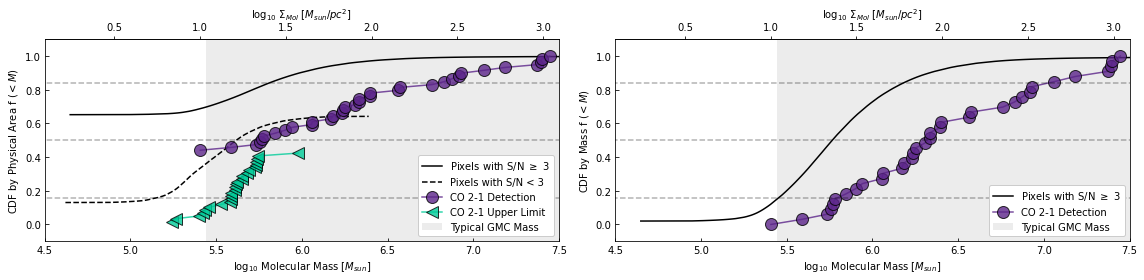

In [8]:
# Single Plot Metallicity Dependent Alpha
darkblue = '#245389'
darkpurple = '#5B2489'
ms = 12
fs = 14

fig, axs = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(16)
axs[0].plot(logCDFAP_D_M_x, AP_D_M_PP_y, color = 'black', linestyle = '-', label = 'Pixels with S/N $\geq$ 3')
axs[0].plot(logCDFAP_ND_M_x, AP_ND_M_PP_y, color = 'black', linestyle = '--', label = 'Pixels with S/N < 3')
# axs.annotate(r'$\alpha_{CO}$: Sun+20', xy=(110, 179), xycoords='axes points',
#             size=14, ha='right', va='top', 
#             bbox=dict(boxstyle='round', fc='w',edgecolor='none'))
axs[0].axhline(y=0.16, xmin=-0.3, xmax = 1.0, ls = '--', color = 'k', alpha = 0.3)
axs[0].axhline(y=0.50, xmin=-0.3, xmax = 1.0, ls = '--', color = 'k', alpha = 0.3)
axs[0].axhline(y=0.84, xmin=-0.3, xmax = 1.0, ls = '--', color = 'k', alpha = 0.3)
axs[0].set_xlabel(r'$\log_{10}$ Molecular Mass [$M_{sun}$]')
secax = axs[0].secondary_xaxis('top', functions=(mass2mgsd, mgsd2mass))
secax.set_xlabel(r'$\log_{10}$ $\Sigma_{Mol}$ $[M_{sun}/pc^2]$')
axs[0].set_ylabel(r'CDF by Physical Area f $ (<M$)')
axs[0].axvspan(xmin=5.44155,xmax = 7.5, facecolor="gray", alpha=0.15, label = "Typical GMC Mass")
axs[0].set_xlim(4.5, 7.5)
axs[0].set_ylim(-0.1, 1.1)
axs[0].plot(logCDFSN_D_M_x, CDFSN_D_M_y, marker = 'o', ms = ms, color = darkpurple,mec='black', alpha = 0.8, label="CO 2-1 Detection")
axs[0].plot(logCDFSN_ND_M_x, CDFSN_ND_M_y, marker = '<',color = "#00cc99",mec='black', ms = ms, alpha = 0.8, label = "CO 2-1 Upper Limit")
axs[0].legend(frameon=True,loc='lower right', facecolor='white', framealpha=1)
axs[0].tick_params(axis='both', direction = "in")

axs[1].plot(logCDFAP_D_only_M_x, logCDFAP_D_only_M_PP_y, color = 'black', linestyle = '-', label = 'Pixels with S/N $\geq$ 3')
axs[1].plot(logCDFSN_D_only_M_x, logCDFSN_D_only_M_y, marker = 'o', ms = ms, color = darkpurple,mec='black', alpha = 0.8, label="CO 2-1 Detection")
axs[1].axhline(y=0.16, xmin=-0.3, xmax = 1, ls = '--', color = 'k', alpha = 0.3)
axs[1].axhline(y=0.50, xmin=-0.3, xmax = 1, ls = '--', color = 'k', alpha = 0.3)
axs[1].axhline(y=0.84, xmin=-0.3, xmax = 1, ls = '--', color = 'k', alpha = 0.3)
axs[1].set_ylabel(r'CDF by Mass f $ (< M $)')
secax = axs[1].secondary_xaxis('top', functions=(mass2mgsd, mgsd2mass))
secax.set_xlabel(r'$\log_{10}$ $\Sigma_{Mol}$ $[M_{sun}/pc^2]$')
axs[1].set_xlabel(r'$\log_{10}$ Molecular Mass [$M_{sun}$]')
axs[1].axvspan(xmin=5.44155,xmax = 7.5, facecolor="gray", alpha=0.15, label = "Typical GMC Mass")
axs[1].set_xlim(4.5, 7.5)
axs[1].set_ylim(-0.1, 1.1)
axs[1].legend(frameon=True,loc='lower right',facecolor='white', framealpha=1)
axs[1].tick_params(axis='both', direction = "in")
plt.tight_layout()
plt.savefig('../Figures/CDF_Mass_ALLSNe_2panel.png', dpi=300)
plt.show()
plt.close()

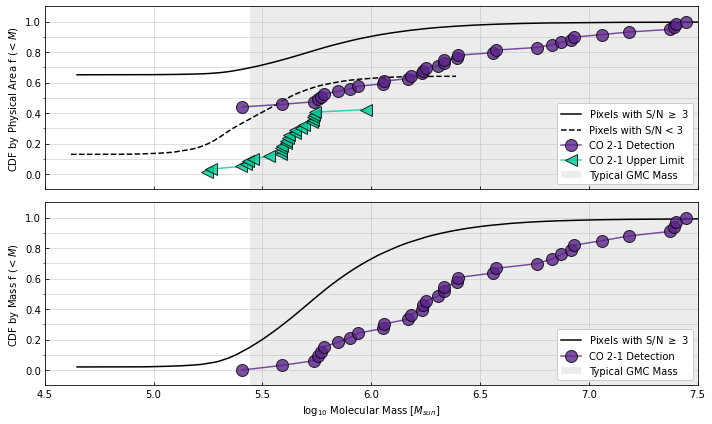

In [9]:
# Single Plot Metallicity Dependent Alpha

from matplotlib.ticker import AutoMinorLocator

minor_locator = AutoMinorLocator(2)
darkblue = '#245389'
darkpurple = '#5B2489'
ms = 12
fs = 14
minorx = [4.5,4.75,5.0,5.25,5.5,5.75,6.0,6.25,6.5,6.75,7.0,7.25,7.5]
minory = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
fig, axs = plt.subplots(nrows=2,ncols=1, sharex=True)
fig.set_figheight(6)
fig.set_figwidth(10)
axs[0].plot(logCDFAP_D_M_x, AP_D_M_PP_y, color = 'black', linestyle = '-', label = 'Pixels with S/N $\geq$ 3')
axs[0].plot(logCDFAP_ND_M_x, AP_ND_M_PP_y, color = 'black', linestyle = '--', label = 'Pixels with S/N < 3')
axs[0].set_ylabel(r'CDF by Physical Area f $ (<M$)')
axs[0].axvspan(xmin=5.44155,xmax = 7.5, facecolor="gray", alpha=0.15, label = "Typical GMC Mass")
axs[0].set_xlim(4.5, 7.5)
axs[0].set_ylim(-0.1, 1.1)
axs[0].plot(logCDFSN_D_M_x, CDFSN_D_M_y, marker = 'o', ms = ms, color = darkpurple,mec='black', alpha = 0.8, label="CO 2-1 Detection")
axs[0].plot(logCDFSN_ND_M_x, CDFSN_ND_M_y, marker = '<',color = "#00cc99",mec='black', ms = ms, alpha = 0.8, label = "CO 2-1 Upper Limit")
axs[0].legend(frameon=True,loc='lower right', facecolor='white', framealpha=1)
axs[0].tick_params(axis='both', direction = "in")
axs[0].xaxis.set_minor_locator(minor_locator)
axs[0].yaxis.set_minor_locator(minor_locator)
axs[0].grid(which='both', alpha=0.5)
axs[1].plot(logCDFAP_D_only_M_x, logCDFAP_D_only_M_PP_y, color = 'black', linestyle = '-', label = 'Pixels with S/N $\geq$ 3')
axs[1].plot(logCDFSN_D_only_M_x, logCDFSN_D_only_M_y, marker = 'o', ms = ms, color = darkpurple,mec='black', alpha = 0.8, label="CO 2-1 Detection")
axs[1].set_ylabel(r'CDF by Mass f $ (< M $)')
axs[1].set_xlabel(r'$\log_{10}$ Molecular Mass [$M_{sun}$]')
axs[1].axvspan(xmin=5.44155,xmax = 7.5, facecolor="gray", alpha=0.15, label = "Typical GMC Mass")
axs[1].set_xlim(4.5, 7.5)
axs[1].set_ylim(-0.1, 1.1)
axs[1].xaxis.set_minor_locator(minor_locator)
axs[1].yaxis.set_minor_locator(minor_locator)
axs[1].grid(which='both', alpha=0.5)
axs[1].legend(frameon=True,loc='lower right',facecolor='white', framealpha=1)
axs[1].tick_params(axis='both', direction = "in")
plt.tight_layout()
plt.savefig('../Figures/CDF_Mass_ALLSNe_2panel_tall.png', dpi=300)
plt.show()
plt.close()

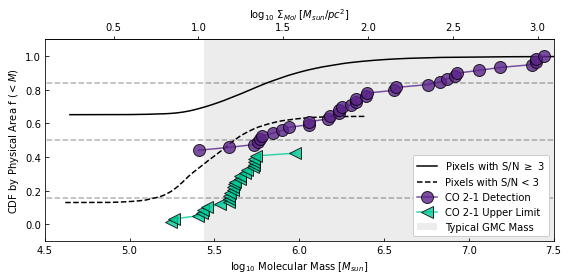

In [10]:
# Single Plot Metallicity Dependent Alpha
darkblue = '#245389'
darkpurple = '#5B2489'
ms = 12
fs = 14

fig, axs = plt.subplots(1,1)
fig.set_figheight(4)
fig.set_figwidth(8)
axs.plot(logCDFAP_D_M_x, AP_D_M_PP_y, color = 'black', linestyle = '-', label = 'Pixels with S/N $\geq$ 3')
axs.plot(logCDFAP_ND_M_x, AP_ND_M_PP_y, color = 'black', linestyle = '--', label = 'Pixels with S/N < 3')
# axs.annotate(r'$\alpha_{CO}$: Sun+20', xy=(110, 179), xycoords='axes points',
#             size=14, ha='right', va='top', 
#             bbox=dict(boxstyle='round', fc='w',edgecolor='none'))
axs.axhline(y=0.16, xmin=-0.3, xmax = 1.0, ls = '--', color = 'k', alpha = 0.3)
axs.axhline(y=0.50, xmin=-0.3, xmax = np.log10(CDFSN_D_M_x[-1]+1000), ls = '--', color = 'k', alpha = 0.3)
axs.axhline(y=0.84, xmin=-0.3, xmax = np.log10(CDFSN_D_M_x[-1]+1000), ls = '--', color = 'k', alpha = 0.3)
axs.set_xlabel(r'$\log_{10}$ Molecular Mass [$M_{sun}$]')
secax = axs.secondary_xaxis('top', functions=(mass2mgsd, mgsd2mass))
secax.set_xlabel(r'$\log_{10}$ $\Sigma_{Mol}$ $[M_{sun}/pc^2]$')
axs.set_ylabel(r'CDF by Physical Area f $ (<M$)')
axs.axvspan(xmin=5.44155,xmax = 7.5, facecolor="gray", alpha=0.15, label = "Typical GMC Mass")
axs.set_xlim(4.5, 7.5)
axs.set_ylim(-0.1, 1.1)
axs.plot(logCDFSN_D_M_x, CDFSN_D_M_y, marker = 'o', ms = ms, color = darkpurple,mec='black', alpha = 0.8, label="CO 2-1 Detection")
axs.plot(logCDFSN_ND_M_x, CDFSN_ND_M_y, marker = '<',color = "#00cc99",mec='black', ms = ms, alpha = 0.8, label = "CO 2-1 Upper Limit")
axs.legend(frameon=True,loc='lower right', facecolor='white', framealpha=1)
axs.tick_params(axis='both', direction = "in")
plt.tight_layout()
plt.savefig('../Figures/CDF_Mass_ALLSNe.png', dpi=300)
plt.show()
plt.close()

In [11]:
#00cc99
#996633

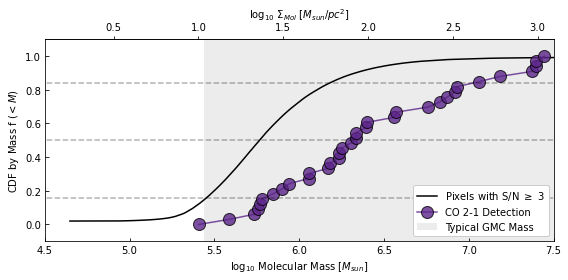

In [12]:
# plot detections only CDF 
fig, axs = plt.subplots(1,1)
fig.set_figheight(4)
fig.set_figwidth(8)
axs.plot(logCDFAP_D_only_M_x, logCDFAP_D_only_M_PP_y, color = 'black', linestyle = '-', label = 'Pixels with S/N $\geq$ 3')
axs.plot(logCDFSN_D_only_M_x, logCDFSN_D_only_M_y, marker = 'o', ms = ms, color = darkpurple,mec='black', alpha = 0.8, label="CO 2-1 Detection")
axs.axhline(y=0.16, xmin=-0.3, xmax = 1, ls = '--', color = 'k', alpha = 0.3)
axs.axhline(y=0.50, xmin=-0.3, xmax = 1, ls = '--', color = 'k', alpha = 0.3)
axs.axhline(y=0.84, xmin=-0.3, xmax = 1, ls = '--', color = 'k', alpha = 0.3)
axs.set_ylabel(r'CDF by Mass f $ (< M $)')
secax = axs.secondary_xaxis('top', functions=(mass2mgsd, mgsd2mass))
secax.set_xlabel(r'$\log_{10}$ $\Sigma_{Mol}$ $[M_{sun}/pc^2]$')
axs.set_xlabel(r'$\log_{10}$ Molecular Mass [$M_{sun}$]')
axs.axvspan(xmin=5.44155,xmax = 7.5, facecolor="gray", alpha=0.15, label="Typical GMC Mass")
axs.set_xlim(4.5, 7.5)
axs.set_ylim(-0.1, 1.1)
axs.legend(frameon=True,loc='lower right',facecolor='white', framealpha=1)
axs.tick_params(axis='both', direction = "in")
plt.tight_layout()
plt.savefig('../Figures/CDF_Mass_ALLSNe_onlyDetections.png', dpi=300)
plt.show()
plt.close()


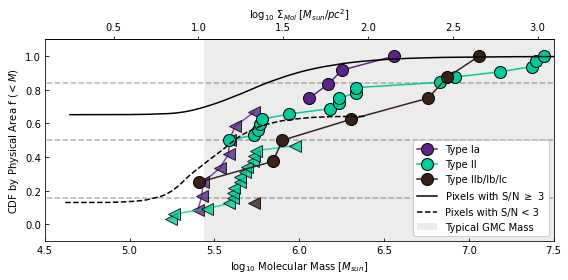

In [13]:
# Single Plot Sun+20 Alpha - All Types!

ms = 12
fs = 14

fig, axs = plt.subplots(1,1)
fig.set_figheight(4)
fig.set_figwidth(8)

# axs.annotate(r'$\alpha_{CO}$: Sun+20', xy=(110, 179), xycoords='axes points',
#             size=14, ha='right', va='top', 
#             bbox=dict(boxstyle='round', fc='w',edgecolor='none'))
axs.axhline(y=0.16, xmin=-0.3, xmax = 1, ls = '--', color = 'k', alpha = 0.3)
axs.axhline(y=0.50, xmin=-0.3, xmax = 1, ls = '--', color = 'k', alpha = 0.3)
axs.axhline(y=0.84, xmin=-0.3, xmax = 1, ls = '--', color = 'k', alpha = 0.3)
secax = axs.secondary_xaxis('top', functions=(mass2mgsd, mgsd2mass))
secax.set_xlabel(r'$\log_{10}$ $\Sigma_{Mol}$ $[M_{sun}/pc^2]$')
axs.set_xlabel(r'$\log_{10}$ Molecular Mass [$M_{sun}$]')
axs.set_ylabel(r'CDF by Physical Area f $ (<M$)')
axs.axvspan(xmin=5.44155,xmax = 7.5, facecolor="gray", alpha=0.15, zorder=0, label="Typical GMC Mass")
axs.set_xlim(4.5, 7.5)
axs.set_ylim(-0.1, 1.1)
axs.plot(logCDFSN_D_M_Ia_x, CDFSN_D_M_Ia_y, marker = 'o', ms = ms, color = darkpurple,mec='black', alpha = 1.0, label="Type Ia")
axs.plot(logCDFSN_ND_M_Ia_x, CDFSN_ND_M_Ia_y, marker = '<',color = darkpurple,mec='black', ms = ms, alpha = 0.8)

axs.plot(logCDFSN_D_M_II_x, CDFSN_D_M_II_y, marker = 'o', ms = ms, color = "#00cc99", mec='black', alpha = 1.0, label="Type II")
axs.plot(logCDFSN_ND_M_II_x, CDFSN_ND_M_II_y, marker = '<',color = "#00cc99",mec='black', ms = ms, alpha = 0.8)

axs.plot(logCDFSN_D_M_SESN_x, CDFSN_D_M_SESN_y, marker = 'o', ms = ms, color = color3of3,mec='black', alpha = 1.0, label="Type IIb/Ib/Ic")
axs.plot(logCDFSN_ND_M_SESN_x, CDFSN_ND_M_SESN_y, marker = '<',color = color3of3,mec='black', ms = ms, alpha = 0.8)
axs.plot(logCDFAP_D_M_x, AP_D_M_PP_y, color = 'black', linestyle = '-', label = 'Pixels with S/N $\geq$ 3')
axs.plot(logCDFAP_ND_M_x, AP_ND_M_PP_y, color = 'black', linestyle = '--', label = 'Pixels with S/N < 3')
axs.legend(frameon=True,loc='lower right', facecolor='white', framealpha=1)
axs.tick_params(axis='both', direction = "in")
plt.tight_layout()
plt.savefig('../Figures/CDF_Mass_ByType.png', dpi=300)
plt.show()
plt.close()

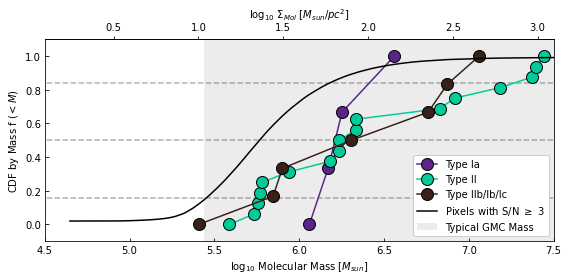

In [14]:
# Single Plot Sun+20 Alpha - All Types Detections Only

ms = 12
fs = 14

fig, axs = plt.subplots(1,1)
fig.set_figheight(4)
fig.set_figwidth(8)

# axs.annotate(r'$\alpha_{CO}$: Sun+20', xy=(110, 179), xycoords='axes points',
#             size=14, ha='right', va='top', 
#             bbox=dict(boxstyle='round', fc='w',edgecolor='none'))
axs.axhline(y=0.16, xmin=-0.3, xmax = 1, ls = '--', color = 'k', alpha = 0.3)
axs.axhline(y=0.50, xmin=-0.3, xmax = 1, ls = '--', color = 'k', alpha = 0.3)
axs.axhline(y=0.84, xmin=-0.3, xmax = 1, ls = '--', color = 'k', alpha = 0.3)
secax = axs.secondary_xaxis('top', functions=(mass2mgsd, mgsd2mass))
secax.set_xlabel(r'$\log_{10}$ $\Sigma_{Mol}$ $[M_{sun}/pc^2]$')
axs.set_xlabel(r'$\log_{10}$ Molecular Mass [$M_{sun}$]')
axs.set_ylabel(r'CDF by Mass f $ (<M$)')
axs.axvspan(xmin=5.44155,xmax = 7.5, facecolor="gray", alpha=0.15, zorder=0, label="Typical GMC Mass")
axs.set_xlim(4.5, 7.5)
axs.set_ylim(-0.1, 1.1)
axs.plot(logCDFSN_D_only_M_Ia_x, logCDFSN_D_only_M_Ia_y, marker = 'o', ms = ms, color = darkpurple,mec='black', alpha = 1.0, label="Type Ia")
axs.plot(logCDFSN_D_only_M_II_x, logCDFSN_D_only_M_II_y, marker = 'o', ms = ms, color = "#00cc99", mec='black', alpha = 1.0, label="Type II")
axs.plot(logCDFSN_D_only_M_SESN_x, logCDFSN_D_only_M_SESN_y, marker = 'o', ms = ms, color = color3of3,mec='black', alpha = 1.0, label="Type IIb/Ib/Ic")
axs.plot(logCDFAP_D_only_M_x, logCDFAP_D_only_M_PP_y, color = 'black', linestyle = '-', label = 'Pixels with S/N $\geq$ 3')
axs.legend(frameon=True,loc='lower right', facecolor='white', framealpha=1)
axs.tick_params(axis='both', direction = "in")
plt.tight_layout()
plt.savefig('../Figures/CDF_Mass_ByType_DetectionsOnly.png', dpi=300)
plt.show()
plt.close()

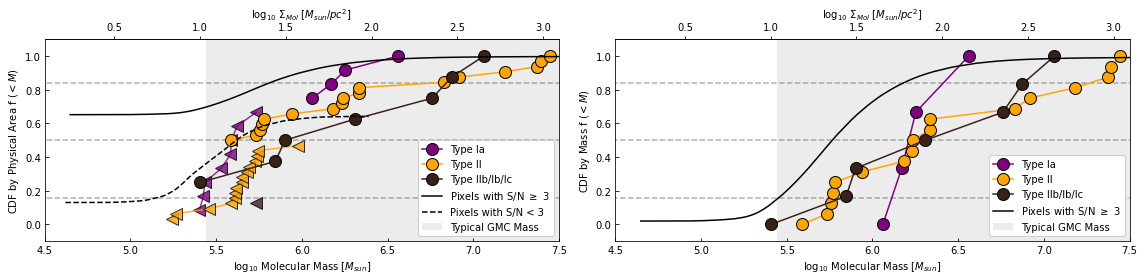

In [15]:
# Single Plot Sun+20 Alpha - All Types!

ms = 12
fs = 14

fig, axs = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(16)

# axs.annotate(r'$\alpha_{CO}$: Sun+20', xy=(110, 179), xycoords='axes points',
#             size=14, ha='right', va='top', 
#             bbox=dict(boxstyle='round', fc='w',edgecolor='none'))
axs[0].axhline(y=0.16, xmin=-0.3, xmax = 1, ls = '--', color = 'k', alpha = 0.3)
axs[0].axhline(y=0.50, xmin=-0.3, xmax = 1, ls = '--', color = 'k', alpha = 0.3)
axs[0].axhline(y=0.84, xmin=-0.3, xmax = 1, ls = '--', color = 'k', alpha = 0.3)
secax = axs[0].secondary_xaxis('top', functions=(mass2mgsd, mgsd2mass))
secax.set_xlabel(r'$\log_{10}$ $\Sigma_{Mol}$ $[M_{sun}/pc^2]$')
axs[0].set_xlabel(r'$\log_{10}$ Molecular Mass [$M_{sun}$]')
axs[0].set_ylabel(r'CDF by Physical Area f $ (<M$)')
axs[0].axvspan(xmin=5.44155,xmax = 7.5, facecolor="gray", alpha=0.15, zorder=0, label="Typical GMC Mass")
axs[0].set_xlim(4.5, 7.5)
axs[0].set_ylim(-0.1, 1.1)
axs[0].plot(logCDFSN_D_M_Ia_x, CDFSN_D_M_Ia_y, marker = 'o', ms = ms, color = "purple",mec='black', alpha = 1.0, label="Type Ia")
axs[0].plot(logCDFSN_ND_M_Ia_x, CDFSN_ND_M_Ia_y, marker = '<',color = "purple", mec='black', ms = ms, alpha = 0.8)

axs[0].plot(logCDFSN_D_M_II_x, CDFSN_D_M_II_y, marker = 'o', ms = ms, color = "orange", mec='black', alpha = 1.0, label="Type II")
axs[0].plot(logCDFSN_ND_M_II_x, CDFSN_ND_M_II_y, marker = '<',color = "orange",mec='black', ms = ms, alpha = 0.8)

axs[0].plot(logCDFSN_D_M_SESN_x, CDFSN_D_M_SESN_y, marker = 'o', ms = ms, color = color3of3,mec='black', alpha = 1.0, label="Type IIb/Ib/Ic")
axs[0].plot(logCDFSN_ND_M_SESN_x, CDFSN_ND_M_SESN_y, marker = '<',color = color3of3,mec='black', ms = ms, alpha = 0.8)
axs[0].plot(logCDFAP_D_M_x, AP_D_M_PP_y, color = 'black', linestyle = '-', label = 'Pixels with S/N $\geq$ 3')
axs[0].plot(logCDFAP_ND_M_x, AP_ND_M_PP_y, color = 'black', linestyle = '--', label = 'Pixels with S/N < 3')
axs[0].legend(frameon=True,loc='lower right', facecolor='white', framealpha=1)
axs[0].tick_params(axis='both', direction = "in")

axs[1].axhline(y=0.16, xmin=-0.3, xmax = 1, ls = '--', color = 'k', alpha = 0.3)
axs[1].axhline(y=0.50, xmin=-0.3, xmax = 1, ls = '--', color = 'k', alpha = 0.3)
axs[1].axhline(y=0.84, xmin=-0.3, xmax = 1, ls = '--', color = 'k', alpha = 0.3)
secax = axs[1].secondary_xaxis('top', functions=(mass2mgsd, mgsd2mass))
secax.set_xlabel(r'$\log_{10}$ $\Sigma_{Mol}$ $[M_{sun}/pc^2]$')
axs[1].set_xlabel(r'$\log_{10}$ Molecular Mass [$M_{sun}$]')
axs[1].set_ylabel(r'CDF by Mass f $ (<M$)')
axs[1].axvspan(xmin=5.44155,xmax = 7.5, facecolor="gray", alpha=0.15, zorder=0, label="Typical GMC Mass")
axs[1].set_xlim(4.5, 7.5)
axs[1].set_ylim(-0.1, 1.1)
axs[1].plot(logCDFSN_D_only_M_Ia_x, logCDFSN_D_only_M_Ia_y, marker = 'o', ms = ms, color = "purple",mec='black', alpha = 1.0, label="Type Ia")
axs[1].plot(logCDFSN_D_only_M_II_x, logCDFSN_D_only_M_II_y, marker = 'o', ms = ms, color = "orange", mec='black', alpha = 1.0, label="Type II")
axs[1].plot(logCDFSN_D_only_M_SESN_x, logCDFSN_D_only_M_SESN_y, marker = 'o', ms = ms, color = color3of3,mec='black', alpha = 1.0, label="Type IIb/Ib/Ic")
axs[1].plot(logCDFAP_D_only_M_x, logCDFAP_D_only_M_PP_y, color = 'black', linestyle = '-', label = 'Pixels with S/N $\geq$ 3')
axs[1].legend(frameon=True,loc='lower right', facecolor='white', framealpha=1)
axs[1].tick_params(axis='both', direction = "in")
plt.tight_layout()
plt.savefig('../Figures/CDF_Mass_ByType_2panel.png', dpi=300)
plt.show()
plt.close()

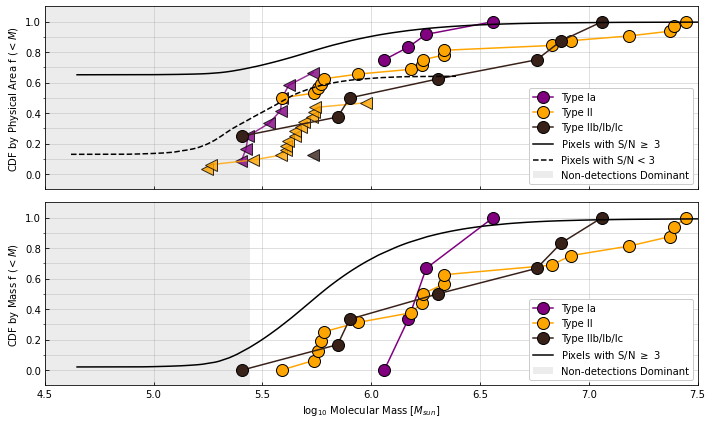

In [19]:
# Single Plot Sun+20 Alpha - All Types!

ms = 12
fs = 14

fig, axs = plt.subplots(2,1, sharex=True)
fig.set_figheight(6)
fig.set_figwidth(10)

axs[0].set_ylabel(r'CDF by Physical Area f $ (<M$)')
axs[0].axvspan(xmin=4.5,xmax=5.44155, facecolor="gray", alpha=0.15, zorder=0, label="Non-detections Dominant")
axs[0].set_xlim(4.5, 7.5)
axs[0].set_ylim(-0.1, 1.1)
axs[0].plot(logCDFSN_D_M_Ia_x, CDFSN_D_M_Ia_y, marker = 'o', ms = ms, color = "purple",mec='black', alpha = 1.0, label="Type Ia")
axs[0].plot(logCDFSN_ND_M_Ia_x, CDFSN_ND_M_Ia_y, marker = '<',color = "purple", mec='black', ms = ms, alpha = 0.8)

axs[0].plot(logCDFSN_D_M_II_x, CDFSN_D_M_II_y, marker = 'o', ms = ms, color = "orange", mec='black', alpha = 1.0, label="Type II")
axs[0].plot(logCDFSN_ND_M_II_x, CDFSN_ND_M_II_y, marker = '<',color = "orange",mec='black', ms = ms, alpha = 0.8)

axs[0].plot(logCDFSN_D_M_SESN_x, CDFSN_D_M_SESN_y, marker = 'o', ms = ms, color = color3of3,mec='black', alpha = 1.0, label="Type IIb/Ib/Ic")
axs[0].plot(logCDFSN_ND_M_SESN_x, CDFSN_ND_M_SESN_y, marker = '<',color = color3of3,mec='black', ms = ms, alpha = 0.8)
axs[0].plot(logCDFAP_D_M_x, AP_D_M_PP_y, color = 'black', linestyle = '-', label = 'Pixels with S/N $\geq$ 3')
axs[0].plot(logCDFAP_ND_M_x, AP_ND_M_PP_y, color = 'black', linestyle = '--', label = 'Pixels with S/N < 3')

axs[0].xaxis.set_minor_locator(minor_locator)
axs[0].yaxis.set_minor_locator(minor_locator)
axs[0].grid(which='both', alpha=0.5)
axs[0].legend(frameon=True,loc='lower right', facecolor='white', framealpha=1)
axs[0].tick_params(axis='both', direction = "in")

axs[1].set_xlabel(r'$\log_{10}$ Molecular Mass [$M_{sun}$]')
axs[1].set_ylabel(r'CDF by Mass f $ (<M$)')
axs[1].axvspan(xmin=4.5,xmax=5.44155, facecolor="gray", alpha=0.15, zorder=0, label="Non-detections Dominant")
axs[1].set_xlim(4.5, 7.5)
axs[1].set_ylim(-0.1, 1.1)
axs[1].plot(logCDFSN_D_only_M_Ia_x, logCDFSN_D_only_M_Ia_y, marker = 'o', ms = ms, color = "purple",mec='black', alpha = 1.0, label="Type Ia")
axs[1].plot(logCDFSN_D_only_M_II_x, logCDFSN_D_only_M_II_y, marker = 'o', ms = ms, color = "orange", mec='black', alpha = 1.0, label="Type II")
axs[1].plot(logCDFSN_D_only_M_SESN_x, logCDFSN_D_only_M_SESN_y, marker = 'o', ms = ms, color = color3of3,mec='black', alpha = 1.0, label="Type IIb/Ib/Ic")
axs[1].plot(logCDFAP_D_only_M_x, logCDFAP_D_only_M_PP_y, color = 'black', linestyle = '-', label = 'Pixels with S/N $\geq$ 3')

axs[1].xaxis.set_minor_locator(minor_locator)
axs[1].yaxis.set_minor_locator(minor_locator)
axs[1].grid(which='both', alpha=0.5)
axs[1].legend(frameon=True,loc='lower right', facecolor='white', framealpha=1)
axs[1].tick_params(axis='both', direction = "in")
plt.tight_layout()
plt.savefig('../Figures/CDF_Mass_ByType_2panel_tall.png', dpi=300)
plt.show()
plt.close()

In [17]:
# Edited until here - CDFs all have different naming scheme now, below code will not run until names changed

In [18]:
def convertNCR(limarray, valarray):
    lims = np.zeros(len(limarray))
    array = np.concatenate((lims, valarray),0)
    ncr = array/array[-1]
    return(ncr)

print(len(logCDFnondetectionSESN_mgsd_mda), len(logCDFdetectionSESN_mgsd_mda))
allPix = convertNCR(logCDFAPLx_mgsd_mda, logCDFAPIx_mgsd_mda)
print(len(allPix))
yPix = np.linspace(0,1.0,len(allPix))
allIIs = convertNCR(logCDFnondetectionII_mgsd_mda, logCDFdetectionII_mgsd_mda)
yIIs = np.linspace(0,1.0,len(allIIs))
allSESN = convertNCR(logCDFnondetectionSESN_mgsd_mda, logCDFdetectionSESN_mgsd_mda)  
ySESN = np.linspace(0,1.0,len(allSESN))
allIas = convertNCR(logCDFnondetectionIa_mgsd_mda, logCDFdetectionIa_mgsd_mda) 
yIas = np.linspace(0,1.0,len(allIas))

print(allPix)
print(yPix)

import seaborn as sns

x, y = np.linspace(-0.01,1.01,100), np.linspace(-0.01,1.01,100)
fig = plt.figure(figsize = (6,6))
#sns.ecdfplot(allPix, label = "All Pixels")
sns.ecdfplot(allIas, label = "SNe Ia", color = color1of3, ls = "-.")
sns.ecdfplot(allIIs, label = "SNe II", color = color2of3, ls = "-")
sns.ecdfplot(allSESN, label = "SNe IIb,Ib,Ic", color = color3of3, ls = "--")
plt.legend(loc = "best", fontsize = 12)
plt.plot(x,y, color='grey',ls = "dotted")
plt.tick_params(axis = "both", which = "both", direction = "in")
plt.xlabel("NCR from CO Map", fontsize = 14)
plt.xlim(-0.01,1.01)
plt.ylim(-0.01,1.01)
plt.ylabel("Fraction of SNe", fontsize = 14)
fig.savefig("../Figures/ECDFTypes.png", dpi=300)
plt.show()

NameError: name 'logCDFnondetectionSESN_mgsd_mda' is not defined

In [ ]:

YarrayAP = np.concatenate((APLy, APIy))
XarrayAP = np.concatenate((logCDFAPLx, logCDFAPIx))

YarraySNe = np.concatenate((ynondetection, ydetection))
XarraySNe = np.concatenate((logCDFnondetection, logCDFdetection))

# XarrayCA = np.concatenate((logCDFnondetection_mgsd_ca, logCDFdetection_mgsd_ca))
# YarrayCA = np.concatenate((ynondetection_mgsd_ca, ydetection_mgsd_ca))

XarrayMDA = np.concatenate((logCDFnondetection_mgsd_mda, logCDFdetection_mgsd_mda))
YarrayMDA = np.concatenate((ynondetection_mgsd_mda, ydetection_mgsd_mda))

# XarrayAP_CA = np.concatenate((logCDFAPLx_mgsd_ca, logCDFAPIx_mgsd_ca))
# YarrayAP_CA  = np.concatenate((APLy_mgsd_ca, APIy_mgsd_ca))

XarrayAP_MDA = np.concatenate((logCDFAPLx_mgsd_mda, logCDFAPIx_mgsd_mda))
YarrayAP_MDA = np.concatenate((APLy_mgsd_mda, APIy_mgsd_mda))

statsSNe     = findStats(YarraySNe, XarraySNe)
statsSNe.append(np.round(np.mean(XarraySNe),2))

# statsCA      = findStats(YarrayCA, XarrayCA)
# statsCA.append(np.round(np.mean(XarrayCA),2))

statsMDA     = findStats(YarrayMDA, XarrayMDA)
statsMDA.append(np.round(np.mean(XarrayMDA),2))

statsAP      = findStats(YarrayAP, XarrayAP)
statsAP.append(np.round(np.mean(XarrayAP),2))

# statsAP_CA   = findStats(YarrayAP_CA, XarrayAP_CA)
# statsAP_CA.append(np.round(np.mean(XarrayAP_CA),2))

statsAP_MDA  = findStats(YarrayAP_MDA, XarrayAP_MDA)
statsAP_MDA.append(np.round(np.mean(XarrayAP_MDA),2))


YarrayII = np.concatenate((ynondetectionII_mgsd_mda, ydetectionII_mgsd_mda))
XarrayII = np.concatenate((logCDFnondetectionII_mgsd_mda, logCDFdetectionII_mgsd_mda))

YarraySESN = np.concatenate((ynondetectionSESN_mgsd_mda, ydetectionSESN_mgsd_mda))
XarraySESN = np.concatenate((logCDFnondetectionSESN_mgsd_mda, logCDFdetectionSESN_mgsd_mda))

YarrayIa = np.concatenate((ynondetectionIa_mgsd_mda, ydetectionIa_mgsd_mda))
XarrayIa = np.concatenate((logCDFnondetectionIa_mgsd_mda, logCDFdetectionIa_mgsd_mda))

statsII     = findStats(YarrayII, XarrayII)
statsII.append(np.round(np.mean(XarraySNe),2))

statsIa      = findStats(YarrayIa, XarrayIa)
statsIa.append(np.round(np.mean(XarrayIa),2))

statsSESN     = findStats(YarraySESN, XarraySESN)
statsSESN.append(np.round(np.mean(XarraySESN),2))

MstatsAP   = mgsd2mass(statsAP_MDA, rnd = 2)
MstatsMDA  = mgsd2mass(statsMDA, rnd = 2)                 
MstatsII   = mgsd2mass(statsII, rnd = 2)
MstatsSESN = mgsd2mass(statsSESN, rnd = 2)
MstatsIa   = mgsd2mass(statsIa, rnd = 2)


CDFStats = Table({'Percentiles' : ["0.05","0.16","0.50","0.84","0.95", "Mean"],
                #'AllPixels'     : statsAP,
                #'AllCA'         : statsAP_CA,
                'AllMDA'        : MstatsAP,
                #'SNe'           : statsSNe,
                #'SNeCA'         : statsCA,
                'SNeMDA'        : MstatsMDA,                   
                'TypeSESN'       : MstatsSESN,
                'TypeII'        : MstatsII,
                'TypeIa'        : MstatsIa
                 })
CDFStats.write('../Data/3.2b.PercentilesStats.tex', format = 'latex', overwrite=True)

CDFStats
